<a href="https://colab.research.google.com/github/BenJMcCarty/king_county_housing/blob/main/P2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 2 Project Notebook - King County House Sales Dataset**

Authors: Ben M, Samantha, Ian, Sanjit

# **Table of Contents** <a name="🔝"></a>


[✨ To-Do's ✨](#td_main)


*Markdown examples for use with later sections of NB*
1. [Importing Packages and Reading Data](#imports)
2. [Section 2](#s2)

test
test
test


## References and Reminders:

---
**Reference Links**

[Project Launch Slides](#https://docs.google.com/presentation/d/1V35_n5Zof-KvfJvkbp8g847CGa9cK7hHLk-6VBUYULg/edit#slide=id.g8067c3178c_0_0)

[Grading Rubric](https://docs.google.com/document/d/1ILvwpx8b9VvV8JLBc6FgZylTet5wNvyZFmpI67wk_8E/edit)

[Project Templates Repo](https://github.com/BenJMcCarty/dsc-project-template)

[Data Science Processes](#https://github.com/learn-co-curriculum/dsc-data-science-processes)

---

**REMINDER** To get datasets from external sources:

1. [Go to GitHub repo](https://github.com/BenJMcCarty/dsc-ols-statsmodels-lab)
2. [Click on data file name in repository list](https://github.com/BenJMcCarty/dsc-ols-statsmodels-lab/blob/master/advertising.csv)
3. [Select "raw" from two buttons on left-side above the data](https://raw.githubusercontent.com/BenJMcCarty/dsc-ols-statsmodels-lab/961d1d4a93790d2c09bcab561d8d2129cc2efa3a/advertising.csv)

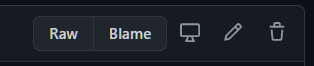

***To read data from the cloud into a JNB:***

```
file_url = 'https://raw.githubusercontent.com/BenJMcCarty/dsc-ols-statsmodels-lab/961d1d4a93790d2c09bcab561d8d2129cc2efa3a/advertising.csv'

data = pd.read_csv(file_url, index_col=0)
```


# ✨ To-Do's ✨ <a name="td_main"></a>

>* ❗ - Review and update these sections
>* **Test**
>* *Test*
---

>* ❗ [Section 1](#s1)
>* ❗ [Section 2](#s2)
>* ❗ [Section 3](#s3)
>* ❗ [Section 4](#s4)
>* ❗ [Section 5](#s5)
>* ❗ [Section 6](#s6)
>* ❗ [Section 7](#s7)


# Importing Packages and Reading Data <a name="imports"></a>

In [3]:
# Data Handling
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling - Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Modeling - SKLearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import RFECV

# Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)

In [8]:
## Reading in the dataset and creating dataframe

file_url = 'https://raw.githubusercontent.com/iansharff/king_county_housing/main/data/kc_house_data.csv'
 
df = pd.read_csv(file_url, index_col=0)

# Data Cleaning and Exploration <a name="s2"></a>

## Basic Overview

The goal for this section is to get a broad idea of the data before I start any cleaning or feature engineering.

In [9]:
## Creating dataframe to summarize the data

report_df = pd.DataFrame({'num_unique':df.nunique(),
              'DTypes':df.dtypes,
              'NaN_sum':df.isna().sum(),
              'NaN_pct':df.isna().sum()/len(df)})
report_df

,num_unique,DTypes,NaN_sum,NaN_pct
date,372,object,0,0.000000
price,3622,float64,0,0.000000
bedrooms,12,int64,0,0.000000
bathrooms,29,float64,0,0.000000
sqft_living,1034,int64,0,0.000000
sqft_lot,9776,int64,0,0.000000
floors,6,float64,0,0.000000
waterfront,2,float64,2376,0.110015
view,5,float64,63,0.002917
condition,5,int64,0,0.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

### Overview Summary

The dataset contains 20 colums of data, most of which seem useful for evaluations and modeling, but "waterfront" and "yr_renovated" are not really usable in their current state due to null values.

The data types seem to be relatively accurate; I will need to change "sqft_basement" to an integer datatype instead of an object, and I can convert some of the categorical features to the "category" datatype to save on memory.

I could convert the date for later calculations, engineering, or modeling. For now, I will leave it as-is.

## Exploring Features

Now I will be comparing each individual feature against "price" to determine if a feature is continuous or categorical.

I will check the regressions and histograms for each feature. If a regression plot shows a flatter regression line or if the histogram is not a normal distribution, I will treat that feature as a categorical feature.

As part of the function to create the plots, I set my function to ignore any outliers for the purpose of the visualizations. I will *not* change the data itself yet.

### Date

### Bedrooms

### Bathrooms

### Sqft_living

### Sqft_lot

### Floors

### Waterfront

### View

### Condition

### Grade

### Sqft_above

### Sqft_basement

### Yr_built

### Zipcode

### Lat/Long

### Sqft_living15

### Sqft_lot15